In [ ]:
# GPU 확인 
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

# 파일불러와서합치기씨빠

In [176]:
cd  ./1차뉴스분류-20220425T013418Z-001/1차뉴스분류/commodities/

C:\Users\bitcamp\Project4\data\1차뉴스분류-20220425T013418Z-001\1차뉴스분류\commodities


In [174]:
pwd

'C:\\Users\\bitcamp\\Project4\\data\\1차뉴스분류-20220425T013418Z-001\\1차뉴스분류\\stock-market'

In [177]:
import os
# csv파일 경로 리스팅 
data_lis = os.listdir('./')
data_lis

['뉴스분류_commodities_news_commodities_1_1.csv.csv',
 '뉴스분류_commodities_news_commodities_1_2.csv.csv',
 '뉴스분류_commodities_news_commodities_2_1.csv.csv',
 '뉴스분류_commodities_news_commodities_2_2.csv.csv']

In [178]:
# csv파일 여러개 읽어와서 합치기 
df_cnbc = pd.DataFrame()

for files in data_lis:
    # advertisement 빼고 합치기 
    if "뉴스" in files:
        df = pd.read_csv(files,index_col=0)
        df_cnbc = pd.concat([df_cnbc,df])    

In [179]:
df = df_cnbc

In [181]:
df = df[['date','news_oil']]

In [182]:
df.dropna(inplace=True)

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_27480/1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [157]:
# df = df.drop('target',axis=1)

In [183]:
df = df.reset_index()

In [184]:
df = df.drop('index',axis=1)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      352 non-null    object
 1   news_oil  352 non-null    object
dtypes: object(2)
memory usage: 5.6+ KB


# 컨텐트열 토크나이징하기 

In [186]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re

In [187]:
def preprocessing(docs):
    tokenizer = RegexpTokenizer('[\w]+')
    stop_words = stopwords.words('english')
    p_stemmer = PorterStemmer()  # 어근 복원 : runs, running, ran => run,  cars => car
#     p = re.compile("[0-9]+")
#     숫자제거해야됨
#     docs = [p.sub(i) for i in docs]
    docs = BeautifulSoup(docs, "html5lib").get_text()
    low = docs.lower()
    tokens = tokenizer.tokenize(low)
    stopped_tokens = [i for i in tokens if not i in stop_words]
    stopped_tokens = [re.sub('[^a-zA-Z0-9]',' ',i) for i in stopped_tokens]
    stemmer_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    one_rmv = [w for w in stemmer_tokens if len(w)>1]
  
    return one_rmv

In [188]:
df['news_oil']= df['news_oil'].apply(preprocessing)

In [193]:
df

,date,news_oil
0,"<span>Apr 14, 2022 11:41AM ET</span>","[timothi, aeppel, reuter, pandem, kent, intern..."
1,"<span>Apr 14, 2022 09:15AM ET</span>","[washington, reuter, import, price, acceler, 1..."
2,"<span>Apr 13, 2022 12:25PM ET</span>","[reuter, annual, inflat, russia, acceler, 17, ..."
3,"<span>Apr 13, 2022 05:11AM ET</span>","[berlin, reuter, germani, would, face, sharp, ..."
4,"<span>Apr 11, 2022 12:20PM ET</span>","[reuter, russian, central, bank, said, monday,..."
...,...,...
347,"<span>Aug 30, 2020 09:56PM ET</span>","[tetsushi, kajimoto, tokyo, reuter, japan, fac..."
348,"<span>Aug 27, 2020 12:00PM ET</span>","[lucia, mutikani, washington, reuter, number, ..."
349,"<span>Aug 25, 2020 01:40PM ET</span>","[lucia, mutikani, washington, reuter, consum, ..."
350,"<span>Aug 21, 2020 08:26AM ET</span>","[david, milliken, andi, bruce, william, schomb..."


In [194]:
preprocessed_sentences = df['news_oil']

In [98]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()

# fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성.
tokenizer.fit_on_texts(preprocessed_sentences) 

In [99]:
print(tokenizer.word_index)

{'said': 1, 'bradi': 2, 'reuter': 3, 'time': 4, 'year': 5, 'album': 6, 'season': 7, 'report': 8, 'record': 9, 'told': 10, 'peopl': 11, 'new': 12, 'win': 13, 'day': 14, 'one': 15, 'last': 16, 'crash': 17, 'two': 18, 'requir': 19, 'grammi': 20, 'would': 21, 'announc': 22, 'week': 23, 'bowl': 24, 'tampa': 25, '30': 26, 'also': 27, 'super': 28, 'sentenc': 29, 'gender': 30, 'chart': 31, 'make': 32, 'offici': 33, 'quarterback': 34, 'nfl': 35, 'famili': 36, 'first': 37, 'best': 38, 'game': 39, 'includ': 40, 'four': 41, 'reev': 42, 'prosecutor': 43, 'monday': 44, 'kill': 45, 'aguilera': 46, 'medero': 47, 'medic': 48, 'bu': 49, 'morrison': 50, 'twitter': 51, 'return': 52, 'sinc': 53, 'world': 54, 'top': 55, 'pass': 56, 'chang': 57, 'nomin': 58, 'nod': 59, 'passeng': 60, 'trump': 61, 'back': 62, '2021': 63, 'seven': 64, 'buccan': 65, 'leagu': 66, 'old': 67, 'futur': 68, 'denver': 69, 'second': 70, 'hear': 71, 'three': 72, 'music': 73, 'tuesday': 74, 'north': 75, 'bulgaria': 76, 'balloon': 77, 't

In [100]:
print(tokenizer.word_counts)

OrderedDict([('jame', 2), ('oliph', 1), ('washington', 3), ('reuter', 30), ('elon', 1), ('musk', 3), ('takeov', 1), ('bid', 2), ('twitter', 9), ('nyse', 4), ('twtr', 4), ('prompt', 1), ('specul', 3), ('would', 13), ('restor', 1), ('donald', 1), ('trump', 8), ('account', 2), ('succe', 1), ('purchas', 1), ('social', 4), ('media', 5), ('platform', 5), ('former', 3), ('presid', 3), ('say', 3), ('probabl', 2), ('go', 6), ('back', 8), ('interview', 2), ('siriu', 1), ('xm', 1), ('nasdaq', 4), ('siri', 1), ('americano', 1), ('wednesday', 2), ('announc', 13), ('said', 80), ('interest', 2), ('return', 9), ('almost', 3), ('90', 1), ('million', 7), ('follow', 5), ('know', 7), ('becom', 3), ('bore', 1), ('gotten', 1), ('rid', 1), ('lot', 5), ('good', 2), ('voic', 3), ('conserv', 3), ('tesla', 1), ('tsla', 1), ('ceo', 1), ('billionair', 1), ('entrepreneur', 1), ('hope', 2), ('take', 6), ('privat', 2), ('intent', 3), ('make', 10), ('free', 4), ('speech', 3), ('perman', 1), ('suspend', 1), ('assault',

In [101]:
len(tokenizer.word_counts)

1558

In [102]:
count =  pd.Series(tokenizer.word_counts.values())
np.mean(count) 
max(count)

80

(array([1.123e+03, 2.290e+02, 5.500e+01, 7.200e+01, 1.900e+01, 2.900e+01,
        8.000e+00, 3.000e+00, 6.000e+00, 1.000e+00, 4.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1.  ,  2.58,  4.16,  5.74,  7.32,  8.9 , 10.48, 12.06, 13.64,
        15.22, 16.8 , 18.38, 19.96, 21.54, 23.12, 24.7 , 26.28, 27.86,
        29.44, 31.02, 32.6 , 34.18, 35.76, 37.34, 38.92, 40.5 , 42.08,
        43.66, 45.24, 46.82, 48.4 , 49.98, 51.56, 53.14, 54.72, 56.3 ,
        57.88, 59.46, 61.04, 62.62, 64.2 , 65.78, 67.36, 68.94, 70.52,
        72.1 , 73.68,

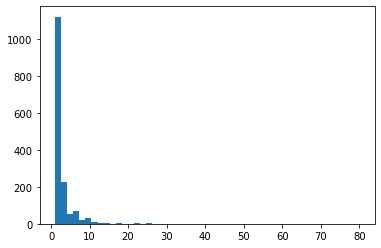

In [78]:
plt.hist(count,bins=50)

In [79]:
vocab_size = 1000
tokenizer = Tokenizer(num_words = vocab_size + 1) # 상위 5개 단어만 사용
tokenizer.fit_on_texts(preprocessed_sentences)

In [195]:
x = tokenizer.texts_to_sequences(preprocessed_sentences)

# 모델 돌리기 

In [196]:
# 기사 최x대길이
max_len = max([len(l) for l in df['news_oil']])

In [197]:
# pad sequence 로 길이 맞춰주기
x = pad_sequences(x, maxlen=max_len)

In [198]:
import tensorflow as tf
import numpy as np

##########모델 로드

model = tf.keras.models.load_model('../../../../best_model/best_model3.h5')


y_predict = model.predict(x)



In [58]:
np.argmax(y_predict[2])

0

In [200]:
리스 = []
for i in range(len(y_predict)):
    리스.append(np.argmax(y_predict[i]))

In [201]:
import collections
# apple3개, banana2개, cherry는 4개
# list = ['apple', 'apple', 'apple', 'banana', 'banana',
# 'cherry', 'cherry', 'cherry', 'cherry']
# 빈도수를 세려면?
counts = collections.Counter(리스)
print(counts)
# 가장 흔하게 등장하는 단어의 첫번째 값을 most_common(1)로 추출
# most_common(1) => [('cherry',4)] _리스트
# most_common(1)[0] => ('cherry', 4) _ 튜플
# most_common(1)[0][0] => cherry _ 튜플에서 첫번째 추출
print('가장 흔한 단어는?: ', counts.most_common(1)[0][0])


Counter({0: 352})
가장 흔한 단어는?:  0


In [170]:
리스

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [199]:
print(y_predict)

[[0.4564308 ]
 [0.4581045 ]
 [0.45144886]
 [0.45859075]
 [0.45698252]
 [0.45545056]
 [0.44907182]
 [0.45407692]
 [0.45582026]
 [0.4546933 ]
 [0.4538288 ]
 [0.45732749]
 [0.45922428]
 [0.4554574 ]
 [0.45108697]
 [0.45526984]
 [0.45107934]
 [0.45641696]
 [0.45411715]
 [0.45271745]
 [0.45222017]
 [0.4564007 ]
 [0.45573977]
 [0.45595545]
 [0.45313138]
 [0.46023867]
 [0.46318203]
 [0.45450738]
 [0.45901373]
 [0.45954028]
 [0.45564172]
 [0.45585102]
 [0.45477086]
 [0.45916227]
 [0.4527031 ]
 [0.45516524]
 [0.45741665]
 [0.45453554]
 [0.45618287]
 [0.45077446]
 [0.45639095]
 [0.4575491 ]
 [0.45512277]
 [0.4576373 ]
 [0.4581812 ]
 [0.45674133]
 [0.4549412 ]
 [0.45863166]
 [0.46096662]
 [0.45646822]
 [0.45579684]
 [0.45498157]
 [0.45720795]
 [0.45240435]
 [0.45430908]
 [0.45247334]
 [0.45539948]
 [0.45596987]
 [0.4567044 ]
 [0.45609388]
 [0.45869708]
 [0.4554029 ]
 [0.45080596]
 [0.45597437]
 [0.45923203]
 [0.4527077 ]
 [0.45412225]
 [0.45737645]
 [0.45217827]
 [0.45409402]
 [0.44944227]
 [0.45

In [192]:
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [150]:
import pickle
import re